# Ultimate Inc. Take-Home Challenge

## Part 1 ‐ Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
#load data
logins = pd.read_json("data/logins.json")
logins.sort_values('login_time', inplace=True)
logins.head(5)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [3]:
#check for null values
logins.isnull().values.any()

False

After checking for null values, we can now look at the data.

In [4]:
#size of data
len(logins)

93142

In [5]:
#start and end datetime
min(logins['login_time']), max(logins['login_time'])

(Timestamp('1970-01-01 20:12:16'), Timestamp('1970-04-13 18:57:38'))

In [6]:
#place values for counting
logins['counts'] = 1
#set log-in time to index
logins = logins.set_index('login_time')
logins.head()

,counts
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [7]:
#resample the data to different intervals
min15 = logins.resample('15min').count()
hourly = logins.resample('H').count()
daily = logins.resample('D').count()

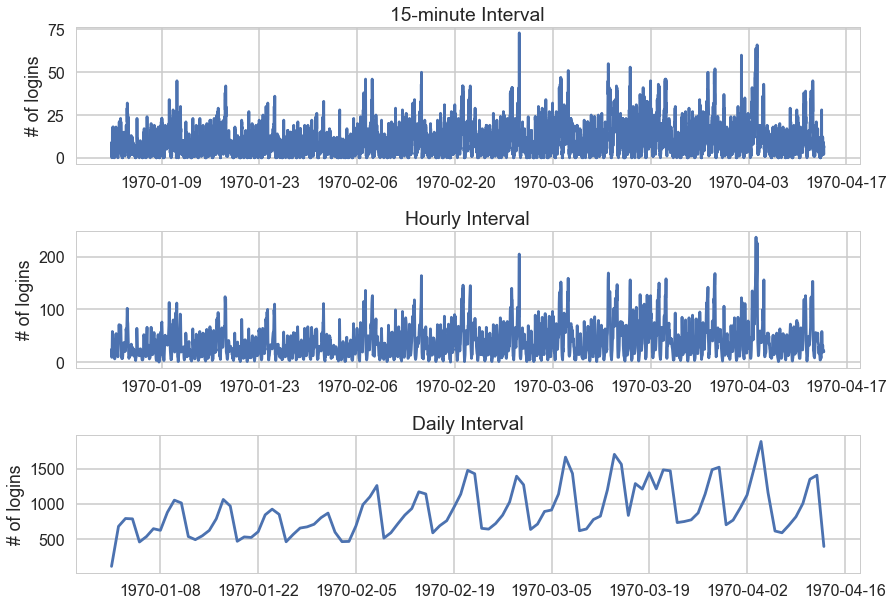

In [8]:
#plot of 15 minute intervals
plt.subplot(311)
plt.plot(min15['counts'])
plt.ylabel('# of logins')
plt.title('15-minute Interval')
plt.tight_layout()

#plot of hourly intervals
plt.subplot(312)
plt.plot(hourly['counts'])
plt.ylabel('# of logins')
plt.title('Hourly Interval')
plt.tight_layout()

#plot of daily intervals
plt.subplot(313)
plt.plot(daily['counts'])
plt.ylabel('# of logins')
plt.title('Daily Interval')
plt.tight_layout()

This visualiztion doesn't show much except that there is clearly an up and down pattern in the data. In order to investigate this further, we will need to look at logins considered as one day and also logins in each day of the week.

In [9]:
#reset the index to modify datetime
min_15 = min15.reset_index()
#dataframe without dates
min15_nd = pd.DataFrame(min_15['login_time'].apply(lambda d : d.time()))
#add counts data
min15_nd['counts'] = min_15['counts']
#group all sums
min15_nd = min15_nd.groupby('login_time').sum()
min15_nd.head()

,counts
login_time,
00:00:00,1439
00:15:00,1547
00:30:00,1525
00:45:00,1482
01:00:00,1549


In [10]:
#xticks to be used in graph
xticks = logins.resample('4H').count()
xticks = xticks.reset_index()
xticks = pd.DataFrame(xticks['login_time'].apply(lambda d : d.time()))
xticks = pd.DataFrame(xticks.set_index('login_time'))

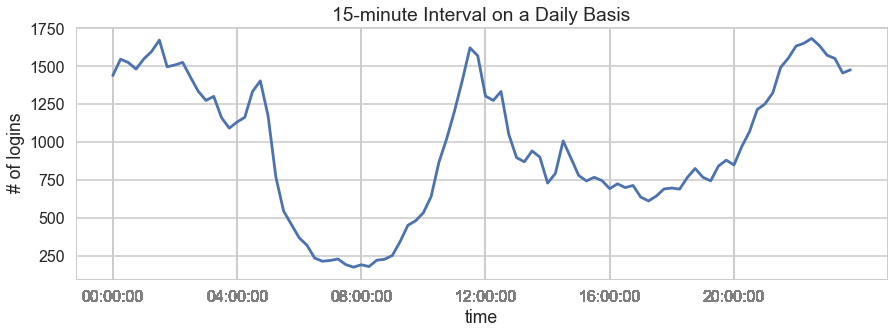

In [11]:
#plot of 15 minute intervals
ax = plt.subplot(211)
plt.plot(min15_nd['counts'])
ax.set_xticks(xticks.index)
ax.xaxis.set_tick_params(labelcolor='grey')
plt.ylabel('# of logins')
plt.title('15-minute Interval on a Daily Basis')
plt.tight_layout()

If we look at how the logins occur on a daily basis, we can see that there are two main peaks if we connect the end of the day with the start of the day. This means that majority of the demand happens on around 11am to 1pm and around 9pm to 5am.

That's an aggregated look of daily data. How about on a weekly basis?

In [12]:
#dataframe with day of week
dow = min15.reset_index()
dow['dayofweek'] = dow['login_time'].dt.dayofweek
dow.set_index('login_time', inplace=True)

In [13]:
#set days to make sure than not all days are represented properly
dowdays = dow['19700105':'19700412']
#groupby days
dow_days = dowdays.groupby('dayofweek').sum()

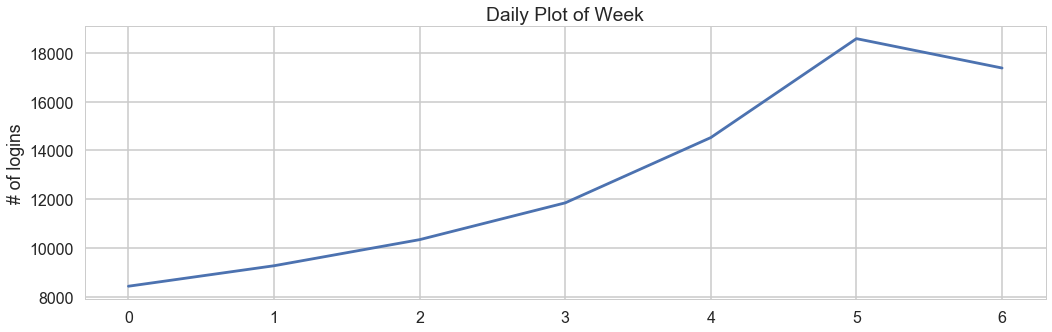

In [14]:
#daily plot of week
plt.figure(figsize=(15,5))
plt.plot(dow_days['counts'])
plt.ylabel('# of logins')
plt.title('Daily Plot of Week')
plt.tight_layout()

0 is equivalent to a Monday and 6 a Sunday. This means that the lowest demand is on a Monday and peaks on a Saturday.

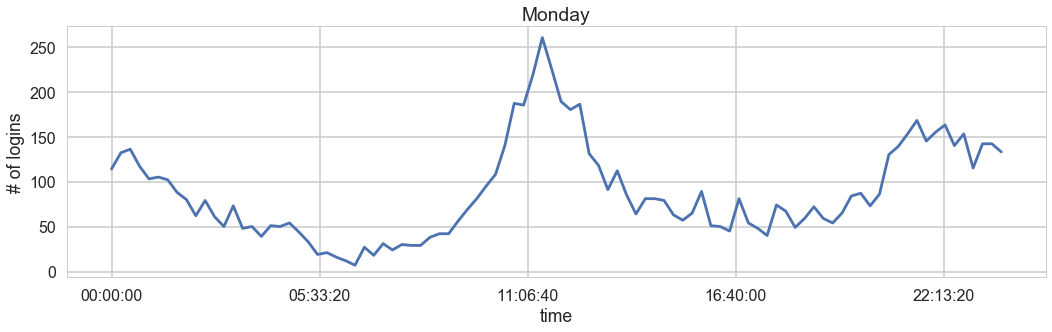

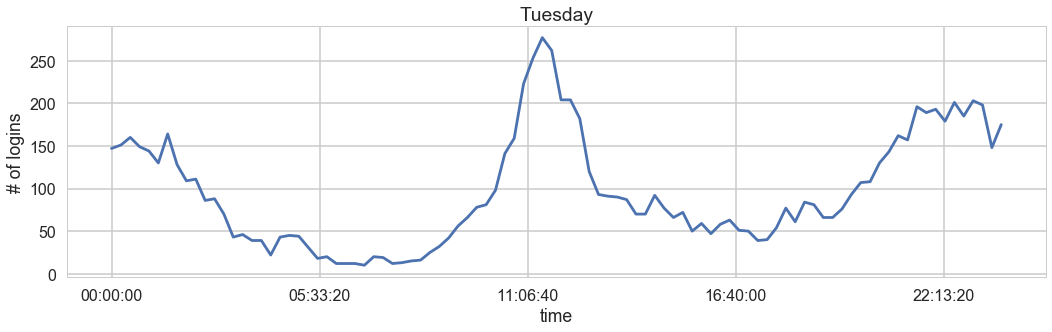

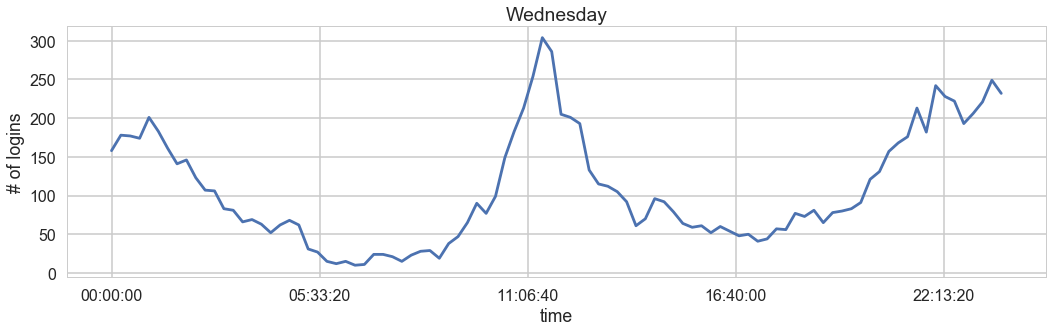

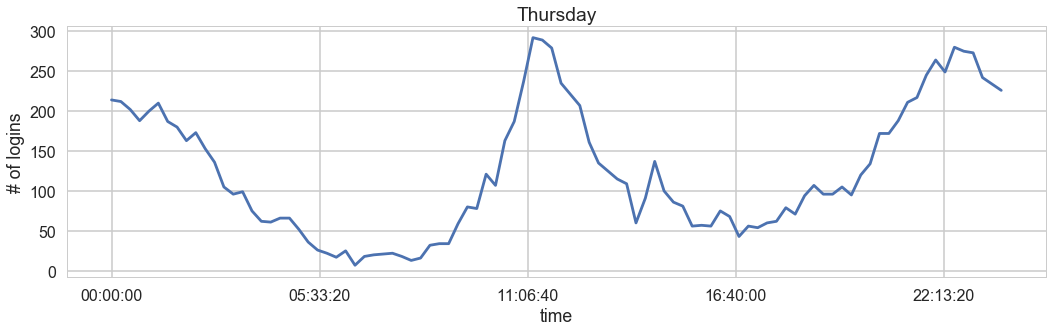

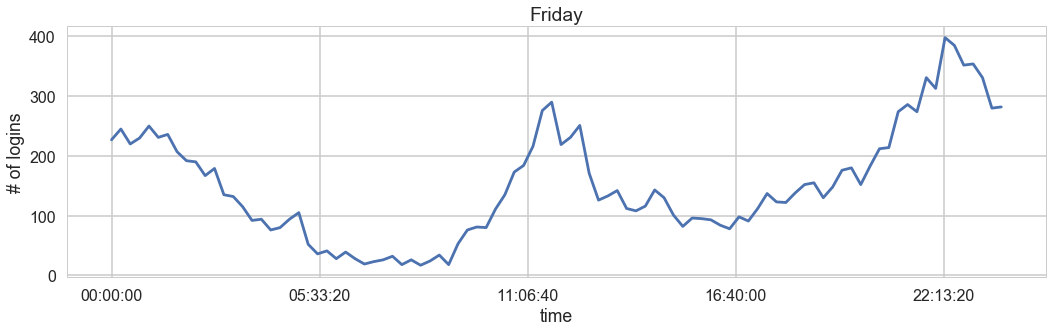

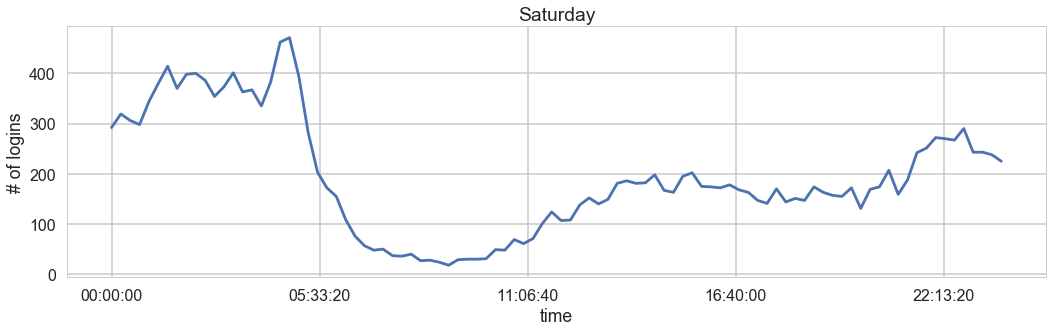

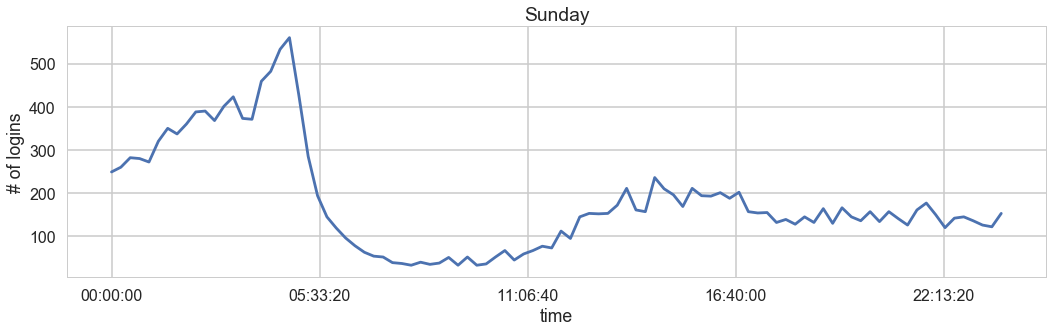

In [15]:
days = range(7)
weekday = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

for d in days:
    plt.figure(figsize=(15,5))
    day = dowdays[dowdays['dayofweek']==d]
    day = day.reset_index()
    d_day = pd.DataFrame(day['login_time'].apply(lambda d : d.time()))
    d_day['counts'] = day['counts']
    d_day = d_day.groupby('login_time').sum()
    
    plt.plot(d_day['counts'])
    plt.ylabel('# of logins')
    plt.title(weekday[d])
    plt.tight_layout()

From the graphs that we see above, we can say that there are two behaviors of demand, a weekday demand and a weekend demand. For the weekdays, we can say that demand peaks usually midday and rises again at the end of the day. Also, it has to be noted that the end of the day demand rises when the week is about to end. Special attention needs to be given to Thursday when end of the day demand is almost equivalent to midday demand and Friday when end of the day demand exceeds midday demand. As for the weekends demands are mostly on the early morning hours. This can be considered as an extention of the last day's demand.

To summarize, we can say that demand increases as the weekend approaches and that there are two demand behaviors from the user base.

On a side note, it would be much better if we can have a year round data to compare seasonal demand and an updated data as this observations may not hold for the current user base.

## Part 2 ‐ Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    
    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the observation
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Anwer

1 - I would choose the number of tolls reimbursed as a key metric of success. If we only look at driver partners' trips' taken it wouldn't necessarily mean that the experiment worked. By focusing on number of tolls, we are able to directly measure if we the experiment is working. If the tolls reimbursed increase significantly then we can say that we are able to achieve the experiment's goal of encouraging driver partners to be available in both cities.

2A - First, I will define the population that will be included in the experiment. It will most likely be a group of partner drivers from both cities who are able to make a number of trips and have been online for a number of hours for the weekdays and the weekends making sure that this are full-time driver partners. 

I will have around 120 driver partners included, 60 from each city. These driver partners will be divited into 4 groups. That means for each city, there would be a test and control group of 30 driver partners to measure if the experiment did work. The only ones that would be given the incentive to reimburse tolls are the test group. The averages of the groups would then be checked if it made any statistical significance.

These experiment should run for 30 days. Data about the 30 day previous trips taken of these partner drivers will also be accounted for to make sure that an increase compared to the other sample is legitimate.

2B - A Z-test would be used to measure the statistical significance since our sample is at least 30 and since we are comparing the results of at least two sample populations. The goal of the test is to reject the null hypothesis that theere is no significant difference between the specified populations. It would mainly be a comparison of average toll trips reimbursed for the test group compared to the control group.

We can also look to compare test groups and control groups between the cities. We can also look into the previous data gathered prior to running the actual experiment and compare it to the 30 day experiment.

2C - If by doing the test, we are able to reject the null hypothesis and deem that our result is statitically significant. We can say that the experiment that the managers initiated is effective. As such, if we are to encourage the driver partners to be available in the two cities, we can roll out the toll reimbursement to every driver partner.

However, I will remind the management that our sample size may have played a factor in that. And by looking at a lot of factors we might have deemed something significant even if it is not. A sampling bias might have happened when we selected the 120 partner drivers and the assumption that these full-time partner drivers that we qualified may have been not representative of the greater population. Finally, it is also possible that the result of the experiment may not have resulted from the toll reimbursements but other external factors which may have not been covered by the experiment.

As a last note, I would still recommend to the management that if they make partner drivers avaiable to both cities they still need to look at the bottom line. Would it really add  a lot of value to the riders, driver partners and the company itself? If the benefits do not outweigh the added cost, I would recommend against it.

## Part 3 ‐ Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

### Load the data

In [16]:
import json

In [17]:
#load and read the json file
with open("data/ultimate_data_challenge.json") as f:
    data = json.load(f)
#create a dataframe
data = pd.DataFrame(data)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [18]:
#convert to datetime
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data['signup_date'] = pd.to_datetime(data['signup_date'])

In [19]:
#check for for null values
data.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
last_trip_date            False
phone                      True
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
dtype: bool

### Cleaning the data

In [20]:
#assumption on when data was pulled
max(data.last_trip_date)

Timestamp('2014-07-01 00:00:00')

In [21]:
#define someone active if they have been active 30 days prior to when the data was pulled
data['active'] = [1 if x > pd.Timestamp('2014-06-01') else 0 for x in data['last_trip_date']]

In [22]:
#convert ultimate_black_user data
data['ultimate_black_user'] = [1 if x == True else 0 for x in data['ultimate_black_user']]

In [23]:
#fill NaN ratings
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean(), inplace=True)
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean(), inplace=True)

In [24]:
#check phone values and totals
data.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [25]:
#check what percentage are NaNs
round(data.phone.isnull().sum()/float(len(data))*100, 2)

0.79

Though it is easy to assume that the user might be using an iPhone or an Android phone it is also possible that this data was gathered at a time when the app was available for a Windows phone as such we will drop NaNs for phones. It is also possible that the user is using both iPhone and Android that's why no primary devixce was detected.

In [26]:
data.dropna(inplace=True)

### EDA and Visaulizations

In [27]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,5.785418,4.777862,4.601482,1.074991,8.875314,2.277256,0.375212,60.883832,0.366503
std,5.669709,0.446220,0.565227,0.222666,19.989018,3.793300,0.484182,37.086239,0.481854
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,0.000000,66.700000,0.000000
75%,6.930000,5.000000,5.000000,1.050000,8.700000,3.000000,1.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.000000,100.000000,1.000000


,city,counts
0,Winterfell,23125
1,Astapor,16413
2,King's Landing,10066


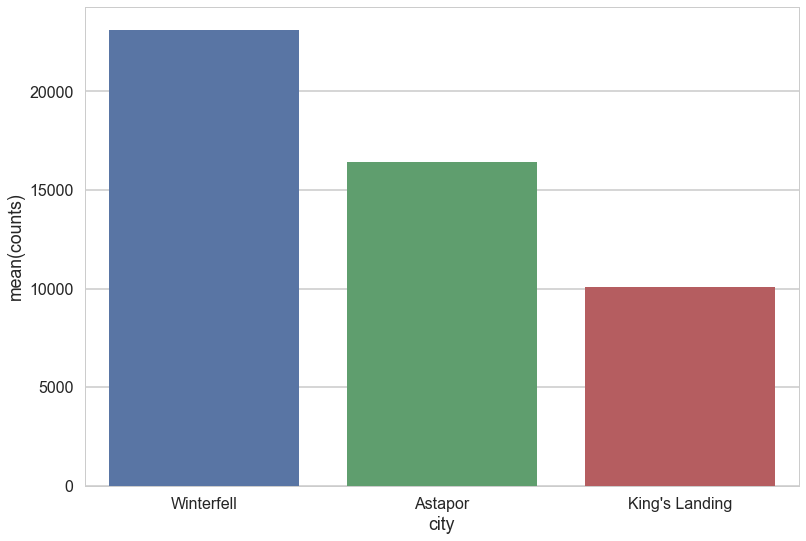

In [28]:
#from which city do we get the most trips?
city = data.groupby('city')['active'].count().sort_values(ascending=False).reset_index(name='counts')
sns.barplot(city['city'], city['counts'])
city

,phone,counts
0,iPhone,34582
1,Android,15022


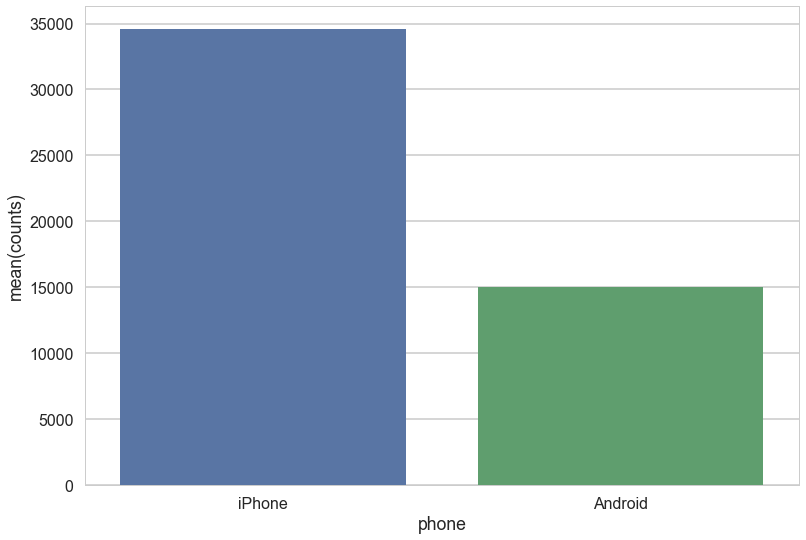

In [29]:
#from which phone do we get the most trips?
phone = data.groupby('phone')['active'].count().sort_values(ascending=False).reset_index(name='counts')
sns.barplot(phone['phone'], phone['counts'])
phone

As can be seen in the data, we now have a better idea about our data statistics as well as from where the users signed up from and what phone the users are using as a primary device. Ultimately, this only gives us a better idea about the user base but nothing really towards the actual problem of retention. Moving forward, we will look at the data in relation to whether a user is retained or not.

In [30]:
#statistics of retained users
data1 = data[data['active']==1]
data1.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
count,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.0
mean,5.117754,4.763122,4.594226,1.073733,9.139642,3.348020,0.510066,62.170781,1.0
std,4.630424,0.324774,0.514878,0.162900,15.499120,5.018833,0.499912,29.094095,0.0
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.560000,4.700000,4.400000,1.000000,0.000000,0.000000,0.000000,45.500000,1.0
50%,3.730000,4.800000,4.700000,1.000000,0.000000,2.000000,1.000000,65.100000,1.0
75%,5.880000,5.000000,5.000000,1.090000,13.300000,4.000000,1.000000,85.700000,1.0
max,160.960000,5.000000,5.000000,4.500000,100.000000,125.000000,1.000000,100.000000,1.0


In [31]:
#statistics of non-retained users
data0 = data[data['active']==0]
data0.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
count,31424.000000,31424.000000,31424.000000,31424.000000,31424.000000,31424.000000,31424.000000,31424.000000,31424.0
mean,6.171688,4.786390,4.605680,1.075718,8.722391,1.657777,0.297193,60.139282,0.0
std,6.158935,0.503081,0.592373,0.250822,22.174103,2.663582,0.457030,40.986772,0.0
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.320000,4.800000,4.500000,1.000000,0.000000,0.000000,0.000000,16.700000,0.0
50%,4.020000,5.000000,4.800000,1.000000,0.000000,1.000000,0.000000,66.700000,0.0
75%,7.750000,5.000000,5.000000,1.000000,0.000000,2.000000,1.000000,100.000000,0.0
max,79.690000,5.000000,5.000000,8.000000,100.000000,73.000000,1.000000,100.000000,0.0


Just by comparing the data statisctics of retained and non-retained users, we can say that the retained users took twice as much trips as non-retained users in the first 30 days and close to twice as much likely to be an ultimate black user compared to non-retained users. Plots of these can be seen next.

In [32]:
#create a firsts dataframe to plot
first1 = data1.groupby('active')['trips_in_first_30_days'].mean().reset_index(name='mean')
first1['active'] = 'Yes'
first0 = data0.groupby('active')['trips_in_first_30_days'].mean().reset_index(name='mean')
first0['active'] = 'No'
firsts = [first1, first0]
firsts = pd.concat(firsts).reset_index(drop=True)

,active,mean
0,Yes,3.348020
1,No,1.657777


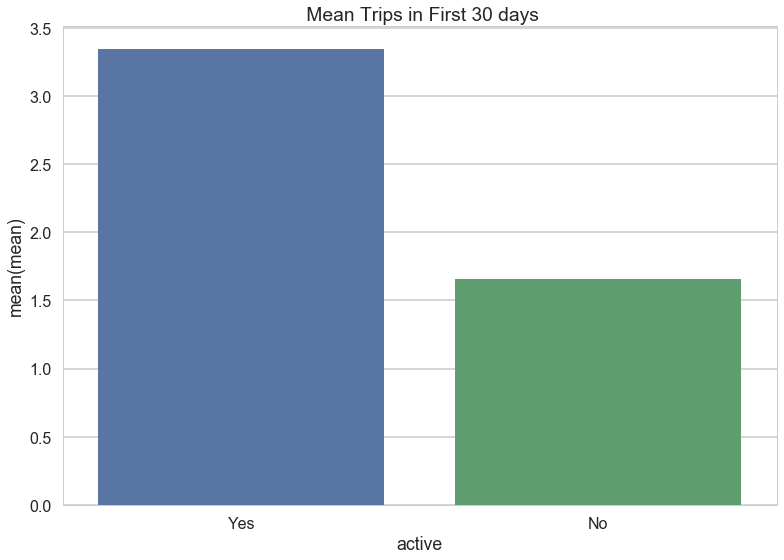

In [33]:
#plot mean trips
sns.barplot(x=firsts['active'], y=firsts['mean'])
plt.title(' Mean Trips in First 30 days' )
firsts

In [34]:
#create an ultimate dataframe to plot
ultimate1 = data1.groupby('active')['ultimate_black_user'].mean().reset_index(name='mean')
ultimate1['active'] = 'Yes'
ultimate0 = data0.groupby('active')['ultimate_black_user'].mean().reset_index(name='mean')
ultimate0['active'] = 'No'
ultimates = [ultimate1, ultimate0]
ultimates = pd.concat(ultimates).reset_index(drop=True)

,active,mean
0,Yes,0.510066
1,No,0.297193


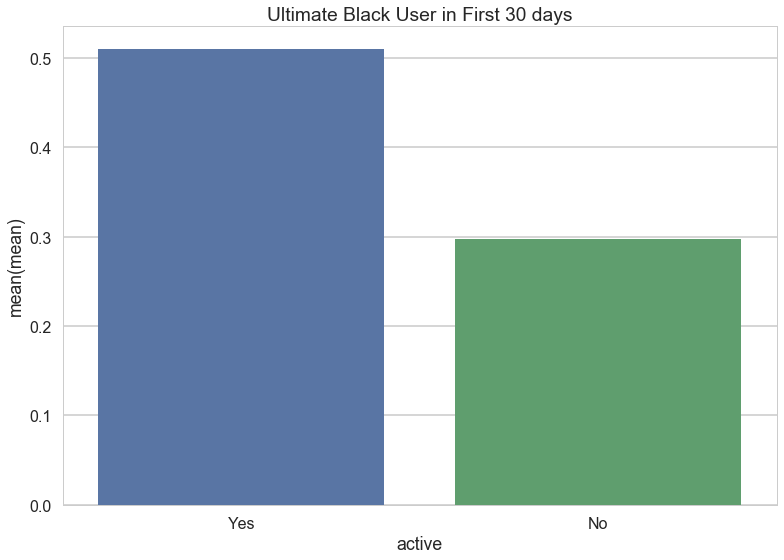

In [35]:
#plot sum of black users
sns.barplot(x=ultimates['active'], y=ultimates['mean'])
plt.title('Ultimate Black User in First 30 days' )
ultimates

Now, let's also look at city and phone information of the retained and non-retained users.

In [36]:
#create a cities dataframe to plot retained vs non-retained users
city1 = data1.groupby('city')['active'].count().sort_values(ascending=False).reset_index(name='counts')
city1['active'] = 'Yes'
city0 = data0.groupby('city')['active'].count().sort_values(ascending=False).reset_index(name='counts')
city0['active'] = 'No'
cities = [city1, city0]
cities = pd.concat(cities).reset_index(drop=True)

,city,counts,active
0,Winterfell,7918,Yes
1,King's Landing,6269,Yes
2,Astapor,3993,Yes
3,Winterfell,15207,No
4,Astapor,12420,No
5,King's Landing,3797,No


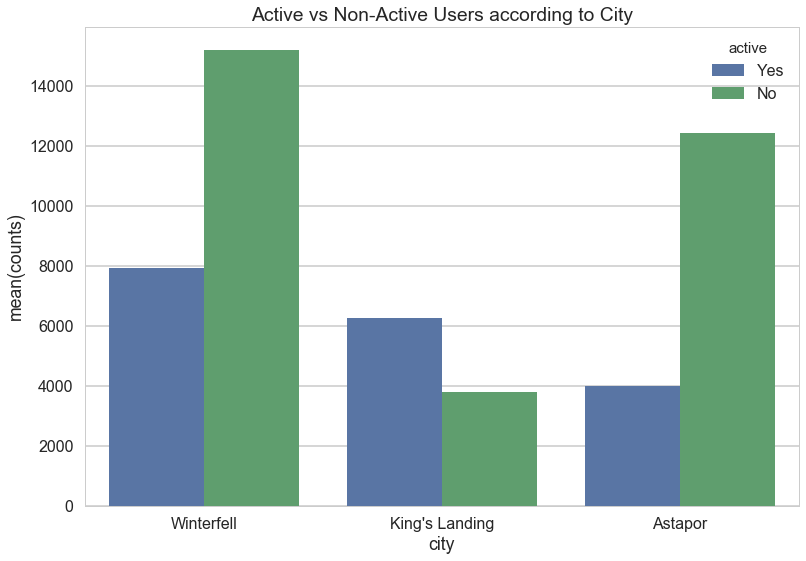

In [37]:
#plot retained vs non-retained users
sns.barplot(x=cities['city'], y=cities['counts'], hue=cities['active'])
plt.title('Active vs Non-Active Users according to City')
cities

It seems we are more likely to retain users from King's Landing than from Winterfell and Astapor. This seems interesting and needs to be investigated further.

In [38]:
data.groupby(['city','active'])['avg_dist'].mean().reset_index()

,city,active,avg_dist
0,Astapor,0,5.751124
1,Astapor,1,4.398437
2,King's Landing,0,6.703229
3,King's Landing,1,5.498690
4,Winterfell,0,6.382455
5,Winterfell,1,5.178899


One thing that's consistent among the cities is that the lesser avg_distance is somewhat related to an active user.

In [39]:
data.groupby(['city','active'])['avg_rating_by_driver'].mean().reset_index()

,city,active,avg_rating_by_driver
0,Astapor,0,4.809960
1,Astapor,1,4.763545
2,King's Landing,0,4.866045
3,King's Landing,1,4.844437
4,Winterfell,0,4.747251
5,Winterfell,1,4.698528


In [40]:
data.groupby(['city','active'])['avg_rating_of_driver'].mean().reset_index()

,city,active,avg_rating_of_driver
0,Astapor,0,4.637400
1,Astapor,1,4.586838
2,King's Landing,0,4.671871
3,King's Landing,1,4.707911
4,Winterfell,0,4.563246
5,Winterfell,1,4.507943


King's Landing seems to have higher ratings of and by drivers. This may mean either the service is better, the users or drivers are just generous with ratings or generally people are much more pleasant in this city.

In [41]:
data.groupby(['city','active'])['avg_surge'].mean().reset_index()

,city,active,avg_surge
0,Astapor,0,1.088044
1,Astapor,1,1.082890
2,King's Landing,0,1.070324
3,King's Landing,1,1.071206
4,Winterfell,0,1.066998
5,Winterfell,1,1.071116


In [42]:
data.groupby(['city','active'])['surge_pct'].mean().reset_index()

,city,active,surge_pct
0,Astapor,0,10.300862
1,Astapor,1,9.729777
2,King's Landing,0,9.061048
3,King's Landing,1,10.552560
4,Winterfell,0,7.348649
5,Winterfell,1,7.723377


In [43]:
data.groupby(['city','active'])['trips_in_first_30_days'].mean().reset_index()

,city,active,trips_in_first_30_days
0,Astapor,0,1.598229
1,Astapor,1,3.030553
2,King's Landing,0,1.676323
3,King's Landing,1,2.943851
4,Winterfell,0,1.701782
5,Winterfell,1,3.828113


In [44]:
data.groupby(['city','active'])['ultimate_black_user'].mean().reset_index()

,city,active,ultimate_black_user
0,Astapor,0,0.331079
1,Astapor,1,0.574505
2,King's Landing,0,0.256782
3,King's Landing,1,0.509332
4,Winterfell,0,0.279608
5,Winterfell,1,0.478151


Trips in first 30 days and ultimate black user does not reveal anythoing new here. As pointed out earlier, active users took ultimate_black and took more trips in the first 30 days than the non-active ones.

In [45]:
data.groupby(['city','active'])['weekday_pct'].mean().reset_index()

,city,active,weekday_pct
0,Astapor,0,59.864243
1,Astapor,1,61.820862
2,King's Landing,0,62.046168
3,King's Landing,1,63.858765
4,Winterfell,0,59.887789
5,Winterfell,1,61.010798


The biggest difference in the cities is the ratings of and by drivers. These ratings should be investigated further as King's Landing might be doing something different that works and is a great opportunity for the other cities to retain active users. The data that we have does not reveal exactly how the ratings can be affected.

In [46]:
#create a phones dataframe to plot retained vs non-retained users
phone1 = data1.groupby('phone')['active'].count().sort_values(ascending=False).reset_index(name='counts')
phone1['active'] = 'Yes'
phone0 = data0.groupby('phone')['active'].count().sort_values(ascending=False).reset_index(name='counts')
phone0['active'] = 'No'
phones = [phone1, phone0]
phones = pd.concat(phones).reset_index(drop=True)

,phone,counts,active
0,iPhone,15238,Yes
1,Android,2942,Yes
2,iPhone,19344,No
3,Android,12080,No


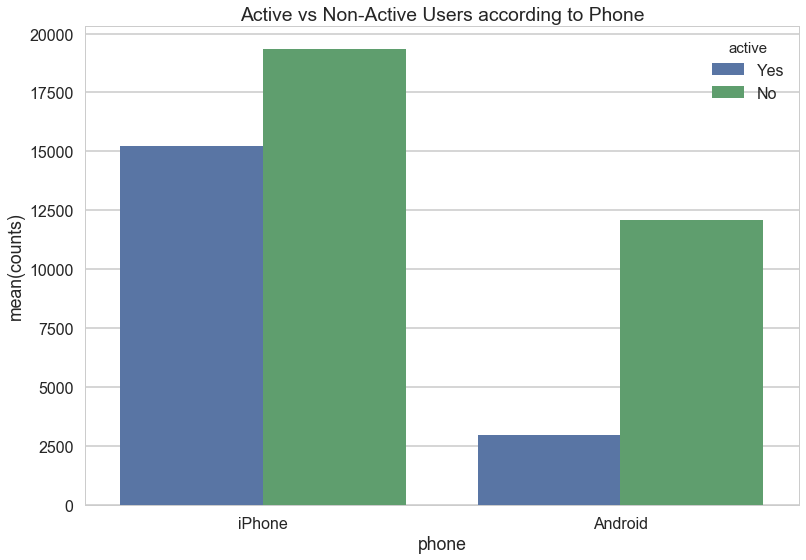

In [47]:
#plot retained vs non-retained users
sns.barplot(x=phones['phone'], y=phones['counts'], hue=phones['active'])
plt.title('Active vs Non-Active Users according to Phone')
phones

It seems we are more likely to retain iPhone users than Android users. While this may be because of some factors beyond Ultimate's concern, it is possible that the user experience of the app may contribute to this.

In [48]:
#fraction of users retained
round(len(data[data['active']==1])/float(len(data))*100, 2)

36.65

Of all the users in the observed data, Ultimate Inc. has been able to retain 36.65% of the users.

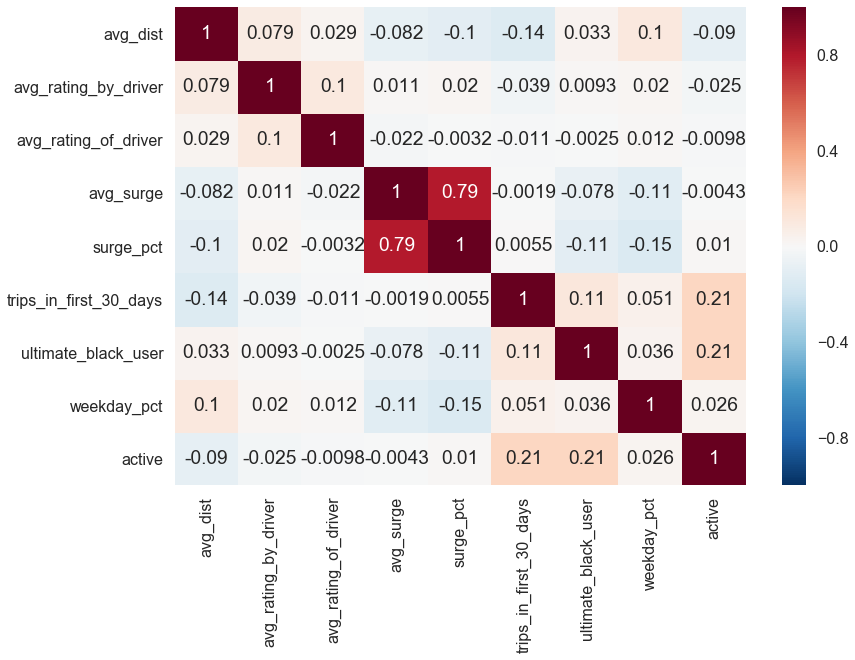

In [49]:
sns.heatmap(data.corr(), annot=True)

This best summarizes the correlations in our observed data. The trips and being an ultimate black user in the first 30 days seems like a good indicators of retention. Take note that this does not include information regarding the city where the users signed-up in and the primary device being used.

### Building a Predictive Model

In [50]:
#check when users signed-up
min(data['signup_date']), max(data['signup_date'])

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-01-31 00:00:00'))

We will assume that all users in the data would be included as the assumed time in pulling the data is on 2014-07-01. All users who signed up in January will be assumed to have signed-up on 2014-01-01 to be included in building the predictive model of a user being active on the 6th month on the system.

In [51]:
#create a dummy dataframe for predictive modelling
dummy = data[['active', 
              'avg_rating_by_driver', 'avg_rating_of_driver',#'avg_dist', avg_surge',
              'weekday_pct',#'surge_pct',
              'city', 'phone',
              'trips_in_first_30_days', 'ultimate_black_user'
             ]]
dummy.head(2)

,active,avg_rating_by_driver,avg_rating_of_driver,weekday_pct,city,phone,trips_in_first_30_days,ultimate_black_user
0,1,5.0,4.7,46.2,King's Landing,iPhone,4,1
1,0,5.0,5.0,50.0,Astapor,Android,0,0


In [52]:
dummies = pd.get_dummies(dummy, columns=dummy[['city', 'phone']])
dummies.head(2)

,active,avg_rating_by_driver,avg_rating_of_driver,weekday_pct,trips_in_first_30_days,ultimate_black_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,1,5.0,4.7,46.2,4,1,0,1,0,0,1
1,0,5.0,5.0,50.0,0,0,1,0,0,1,0


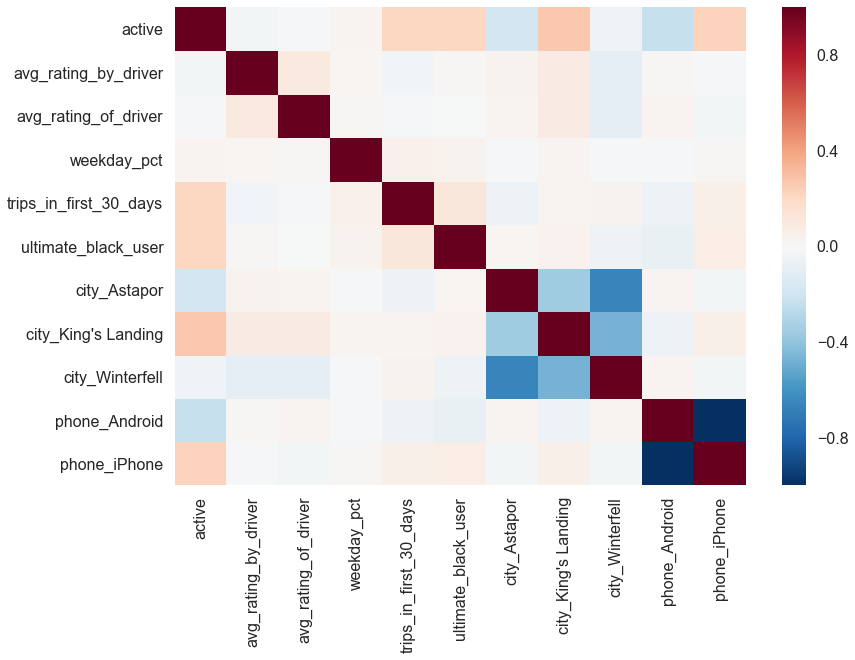

In [53]:
sns.heatmap(dummies.corr())

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(dummies.loc[:, 'avg_rating_by_driver':], dummies['active'],
                                                    test_size=0.20,
                                                    random_state=1)

In [56]:
from sklearn.svm import SVC

In [57]:
clf = SVC(random_state=1)

In [58]:
%%time
clf.fit(X_train, y_train)

CPU times: user 46 s, sys: 427 ms, total: 46.4 s
Wall time: 46.5 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
#score on training data
clf.score(X_train, y_train)

0.78610488118337829

In [60]:
#score on test data
clf.score(X_test, y_test)

0.78228001209555487

In [61]:
#score our model
from sklearn.metrics import recall_score, f1_score, precision_score

In [62]:
#A low precision means a large number of false positives
precision_score(y_test, clf.predict(X_test))

0.71897027275513337

In [63]:
#A low recall means a large number of false negatives
recall_score(y_test, clf.predict(X_test))

0.65366397325160208

In [64]:
#f1 score is the weighted average of the precision and recall
f1_score(y_test, clf.predict(X_test))

0.6847635726795096

I choose to use SVM because it was the best performing classifier I tried in terms of accuracy and f1 score. It also avoided over-fitting unlike when I used KNN, Decision Trees and Random Forest classifiers. This is because SVMs do some extremely complex transformations and then figure out how to separate data based on the labels defined.

While we do not need to perform these trasnformations on our own, the downside is training time takes much longer and it is much more computationally intensive. Also, because of this complex transformations it is hard to determine which features contribute the most to the model.

Aside from the mentioned classfiers, I also looked into using logistical regression. It didn't perform much better in terms of accuracy and it performed much worse in terms of precission and recall scores.

I also used PCA to reduce the dimensions but the model didn't perform as well as the one here. Manually removing some data helped improve it and at the same time gave more insight on the data. (Though this isn't an efficient use of time.)

GridSearch didn't help as well because it just returned the default parameter, it took several minutes to get to that. A Pipeline was used for these steps including the SVM.

### Results and Insights

The accuracy score on the train and test data is 78% with an F1 score of 68%. By manually removing some features of the data it has been determined that the percent of user's trips occurring on a weekday, the trips within the first 30 days along with being a black user, city signed up from, primary device of the user and also the ratings to both driver and user have been been the best predictors of user retention.

The degree to how much important each feature is would be unknown because of the transformations in SVM. But if we base this idea on removing some features, the one that caused the largest drop is the percent of user's trips occuring on a weekday.

### Recommendation

The best way to increase retention is to make sure that the user takes trips within the first 30 days and having a good user experience while doing it. This can be done by giving promos to new users, promos for them to try out Ultimate Black(assuming it provides a better experience), making it more avaialble to the cityand improving the user app experience. This will lead the user to use the service regularly thus including weekday use.

### Note on the data:

There seems to be some inconsitency with the data as ultimate black users, as defined here, are users that took ultimate black within the first thrity days. There are some users who are declared to have never taken a trip on the first 30 days but are said to be an ultimate black user. For the purpose of the challenge, all this information was looked at in the aggregate and that consideration was not considered.

In [65]:
#get the black users and those who had no trips
black = data[(data['ultimate_black_user'] == 1)]
black_trips = black[black['trips_in_first_30_days'] == 0]
black_trips[['ultimate_black_user', 'trips_in_first_30_days']].head()

,ultimate_black_user,trips_in_first_30_days
17,1,0
23,1,0
68,1,0
79,1,0
84,1,0
